# Trajectory Generation

Consider a polynomial trajectory in one variable of the form.

$p(t) = c_0 + c_1 t + c_2 t^2 + c_3 t^3 \ldots + c_j t^j$

which we can write in summation notation as:

$p(t) = \sum\limits_{k=0}^{n} c_k t^k$

We can find the derivative:

$p'(t) = \sum\limits_{k=1}^{n} c_k k t^{k-1}$

We wish to find the polynomial that satisfies the follwing boundary conditions:

$p(0) = 1$, $p(1) = 2$, $p'(0) = 3$, $p'(1) = 4$

We chose this boundary conditions arbitarily as an example.

Using our equations for $p(t)$ and $p'(t)$ above, we are left with the equations:

$p(0) = \sum\limits_{k=0}^{n} c_k (0)^k = c_0 = 1$

$p(1) = \sum\limits_{k=0}^{n} c_k (1)^k = \sum\limits_{k=0}^{n} c_k = 2$

$p'(0) = \sum\limits_{k=1}^{n} c_k k (0)^{k-1} = c_1 = 3$

$p'(1) = \sum\limits_{k=1}^{n} c_k k (1)^{k-1} = \sum\limits_{k=1}^{n} c_k k = 4$

Here we have 4 boundary conditions, so we need a 3rd order polynomial, with 4 coefficients to uniquely satisfy them. Hence, $n=3$.

In matrix form, we can write the equations as:

$Ax = b$

where:    
$A = \begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 \\
0 & 1 & 0 & 0 \\
0 & 1 & 2 & 3 \\
\end{bmatrix}$
$x = \begin{bmatrix}
c_0 \\ c_1 \\ c_2 \\ c_3
\end{bmatrix}$
$b = \begin{bmatrix}
1 \\ 2 \\ 3 \\ 4
\end{bmatrix}$

Since this matrix is invertible, we can find the coefficients of the polynomial satisfying the boundary conditions with:

$x = A^{-1}b$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([
    [1, 0, 0, 0],
    [1, 1, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 2, 3],
])
b = np.array([[1, 2, 3, 4]]).T
x_val = np.linalg.inv(A).dot(b)
x_val

array([[ 1.],
       [ 3.],
       [-7.],
       [ 5.]])

Text(0, 0.5, '$\\ddot{x}$')

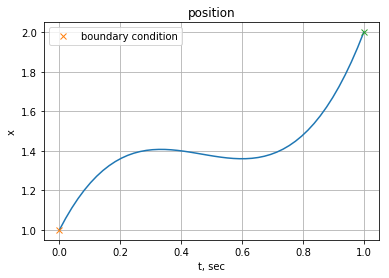

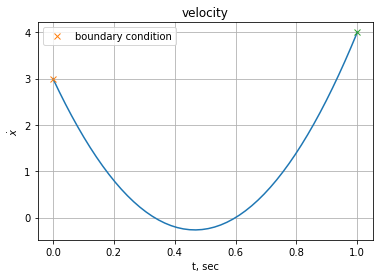

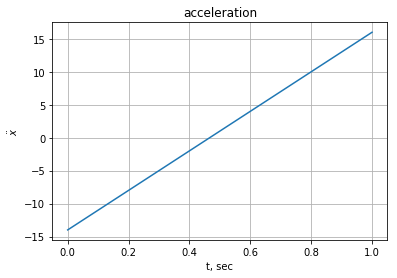

In [2]:
t = np.linspace(0, 1)
n = 3

x = 0
for i in range(n + 1):
    x += x_val[i]*t**i

xd = 0
for i in range(1, n + 1):
    xd += i*x_val[i]*t**(i-1)

xdd = 0
for i in range(2, n + 1):
    xdd += i*(i-1)*x_val[i]*t**(i-2)
    
plt.figure()
plt.plot(t, x)
plt.plot(0, b[0], 'x', label='boundary condition')
plt.plot(1, b[1], 'x')
plt.grid()
plt.title('position')
plt.xlabel('t, sec')
plt.ylabel('x')
plt.legend()

plt.figure()
plt.plot(t, xd)
plt.plot(0, b[2], 'x', label='boundary condition')
plt.plot(1, b[3], 'x')
plt.grid()
plt.title('velocity')
plt.xlabel('t, sec')
plt.ylabel('$\dot{x}$')
plt.legend()

plt.figure()
plt.plot(t, xdd)
plt.grid()
plt.title('acceleration')
plt.xlabel('t, sec')
plt.ylabel('$\ddot{x}$')